In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.stats  
from matplotlib import ticker

In [4]:
f = open("X:\\Всячина\\Математика\\Типовик_Статистика\\array4.csv",'r')
f.readline()
with f as File:
    reader = csv.reader(File)
    for row in reader:
        sample = pd.Series(row, dtype=float)

sample.name = 'sample'

In [5]:
print("Нам досталась выборка размером 1000 элементов")
print("Отсортируем элементы по значению:\n")

print("[", end = '')
for i in range(0,3):
    print(sample.values[i], end = " ")
print("...", end = ' ')
for i in range(997,999):
    print(sample.values[i], end = " ")
print(sample.values[999],end='')
print("]")

Нам досталась выборка размером 1000 элементов
Отсортируем элементы по значению:

[-6.29 2.36 -3.73 ... -1.63 -2.09 -2.93]


In [6]:
sum = 0
n = 1000
for i in sample.values:
    sum += i
E = sum/1000
deviation = 0
for i in sample.values:
    deviation += (i-E)**2
S = deviation/1000
S_unbiased = (1000/(1001.0))*S
print("Найдём выборочную дисперсию(S), исправленную и выборочное среднее(E):\n")
print("E =", E)
print("S =", S)
print("S_несм =", S_unbiased)

Найдём выборочную дисперсию(S), исправленную и выборочное среднее(E):

E = -1.4191899999999975
S = 7.6057176438999905
S_несм = 7.598119524375615


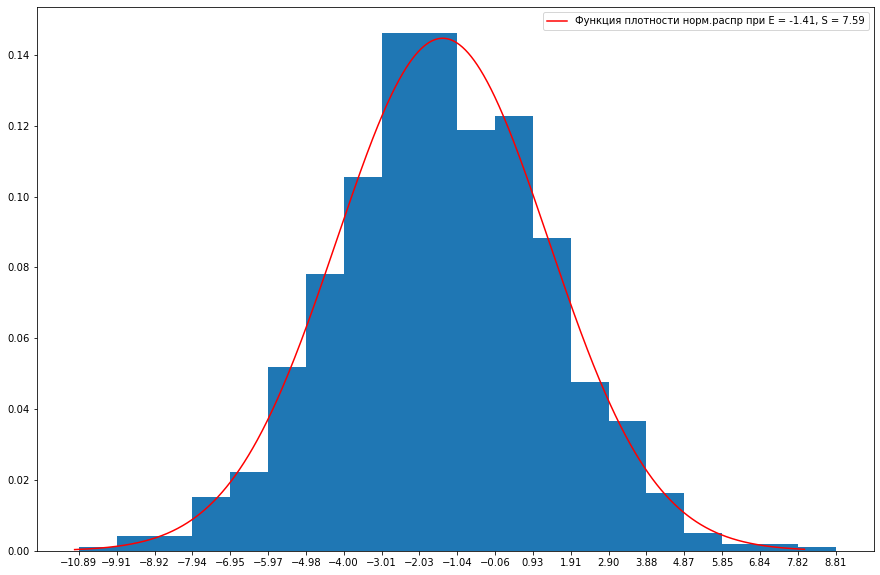

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax.hist(sample, bins = 20, density=True)
ax.plot(np.linspace(-11,8,1000), scipy.stats.norm.pdf(np.linspace(-11,8,1000),E,S_unbiased**0.5), color='r', label = 'Функция плотности норм.распр при E = -1.41, S = 7.59')
ax.legend()
plt.xticks(ticks = np.arange(-10.89, 8.81, 0.985))
plt.show()

In [8]:
a = 0.95
c = scipy.stats.norm.ppf((a+1)/2)
print(c)
l = E-((S_unbiased**0.5)*c*(n**0.5))/n
r = E+((S_unbiased**0.5)*c*(n**0.5))/n

1.959963984540054


In [9]:
print(l, r)

-1.5900345587883913 -1.2483454412116037


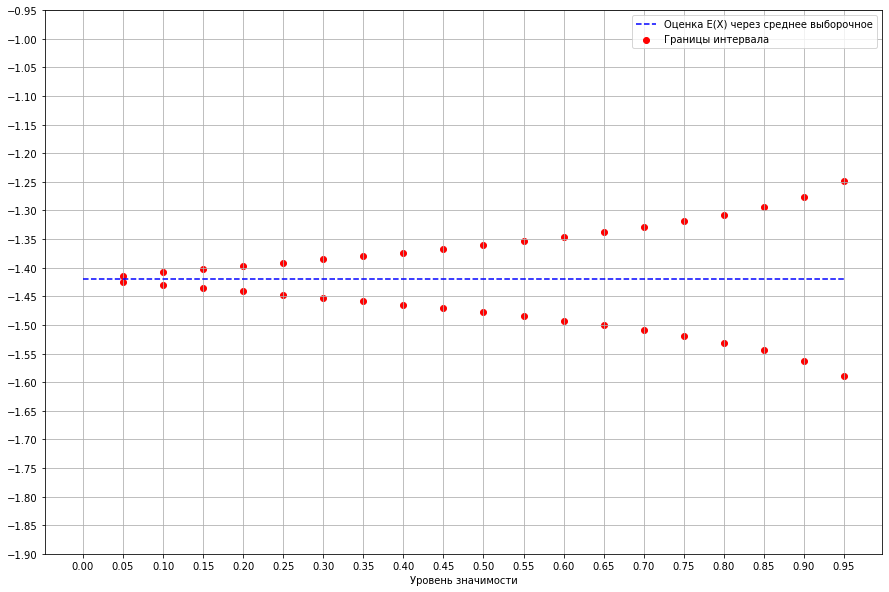

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
x = np.arange(0.05,0.99, 0.05)
y = []
for i in x:
    c = scipy.stats.norm.ppf((i+1)/2)
    y.append(E-((S_unbiased**0.5)*c*(n**0.5))/n)
    r = E+((S_unbiased**0.5)*c*(n**0.5))/n
#     ax.scatter(i, l, c = 'r')
#     ax.scatter(i, r, c = 'r')
#     ax.plot([i]*100, np.linspace(l,r,100), c = 'b')

ax.scatter(x, y, c = 'r', label = 'Границы интервала')

y = []
for i in x:
    c = scipy.stats.norm.ppf((i+1)/2)
    y.append(E+((S_unbiased**0.5)*c*(n**0.5))/n)
    r = E+((S_unbiased**0.5)*c*(n**0.5))/n

ax.scatter(x, y, c = 'r')
ax.plot(np.linspace(0, 0.95, 100), [E]*100, 'b--', label = 'Оценка E(X) через среднее выборочное')
ax.legend()
ax.grid()
ax.set_xlabel('Уровень значимости')
plt.xticks(ticks = np.arange(0, 1, 0.05))
plt.yticks(ticks = np.arange(-1.9, -0.9, 0.05))
plt.rc('grid', linestyle="-", color='black')
plt.show()

0     -6.29
1      2.36
2     -3.73
3     -0.28
4     -6.43
       ... 
995    1.91
996   -3.77
997   -1.63
998   -2.09
999   -2.93
Name: sample, Length: 1000, dtype: float64


0.9850000000000001


In [260]:
array = sample.values
chi_squared = 0.0
for i in range(10):
    p_i = scipy.stats.norm.cdf(array[100*i+99], E, S_unbiased**0.5)-scipy.stats.norm.cdf(array[100*i], E, S_unbiased**0.5)
    chi_squared += ((100-n*p_i) / ((n*p_i)**0.5))**2

In [262]:
print(chi_squared)

6.800150197029295


In [263]:
print("[", end = '')
for i in range(0,3):
    print(sample.values[i], end = " ")
print("...", end = ' ')
for i in range(997,999):
    print(sample.values[i], end = " ")
print(sample.values[999],end='')
print("]")

[-10.89 -9.13 -9.12 ... 6.95 7.06 8.81]
